<h2> 3.6 Featurizing text data with tfidf weighted word-vectors </h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy
import warnings
warnings.filterwarnings("ignore")

In [332]:
# avoid decoding problems
df = pd.read_csv("train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [333]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [334]:
#getting the nlp and basic features 
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [335]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['qid1','qid2'],axis=1)
df3=df3.merge(df2,how='left',on='id')
df3=df3.merge(df1,how='left',on='id')
df3.head(2)

,id,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


In [336]:
#splitting the dataset 
X=df3.drop(['is_duplicate'],axis=1)
Y=df3['is_duplicate']
X=X[:100000]
Y=Y[:100000]

In [342]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#splitted the data in to train and test
x_train,x_test_data,y_train_data,y_test_data = train_test_split(X, Y, test_size=0.3, random_state=0)
#splitted the above train data into 2nd train and cross validation 
x_train_data,x_cv_data,y_train_data,y_cv_data = train_test_split(x_train, y_train, test_size=0.3, random_state=0)

print("Data splitted sucessfully in to train ,test,cv")

Data splitted sucessfully in to train ,test,cv


In [343]:
#train_data
x_train_data = pd.DataFrame(x_train_data)
y_train_data = pd.DataFrame(y_train_data)
frames_train = [x_train_data,y_train_data]
result = pd.concat(frames_train,axis=1, sort=False)
train_df=pd.DataFrame(result)
print(train_df.shape)
train_df.head(2)


(49000, 30)


,id,question1,question2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,...,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,is_duplicate
60377,60377,What is svchost.exe?,What is Crofx.exe?,5,2,20,18,3,3,2.0,...,1.0,1.0,0.0,4.0,79,61,78,72,0.421053,0
87223,87223,Can you bleach your hair with household bleach?,How do you bleach the ends of your hair?,1,2,47,40,8,9,3.0,...,0.0,0.0,1.0,8.5,74,71,49,55,0.292683,0


In [344]:
#cv_data
x_cv_data = pd.DataFrame(x_cv_data)
y_cv_data = pd.DataFrame(y_cv_data)
frames_cv = [x_cv_data,y_cv_data]
result = pd.concat(frames_cv,axis=1, sort=False)
cv_df=pd.DataFrame(result)
print(cv_df.shape)
cv_df.head(2)

(21000, 30)


,id,question1,question2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,...,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,is_duplicate
29641,29641,How have pangolins adapted to survive in nature?,I need to escape from everyone in my life for ...,1,1,48,149,8,30,4.0,...,0.0,0.0,22.0,19.0,76,40,23,44,0.224490,0
1501,1501,What do people from Myanmar think about Indians?,What do people think about Indian women?,1,1,48,40,8,7,5.0,...,0.0,1.0,1.0,7.5,84,77,77,68,0.463415,0


In [345]:
#test_data
x_test_data = pd.DataFrame(x_test_data)
y_test_data = pd.DataFrame(y_test_data)
frames_test = [x_test_data,y_test_data]
result = pd.concat(frames_test,axis=1, sort=False)
test_df=pd.DataFrame(result)
print(test_df.shape)
test_df.head(2)

(30000, 30)


,id,question1,question2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,...,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,is_duplicate
3582,3582,Why is the Zabbix server not running? How can ...,Why is my proxy server is refusing connections...,1,2,55,66,12,13,6.0,...,0.0,1.0,1.0,12.5,68,67,62,55,0.142857,0
60498,60498,How can I get my parents to let me play video ...,How can I get my 13-year-old daughter to step ...,1,2,71,63,15,13,7.0,...,0.0,1.0,0.0,15.0,56,48,52,52,0.265625,0


In [346]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# merge q1 and q2

train_questions1 = train_df['question1']
train_questions2 = train_df['question2'] 

cv_questions1 = cv_df['question1']
cv_questions2 = cv_df['question2'] 

test_questions1 = test_df['question1']
test_questions2 = test_df['question2'] 

tfidf = TfidfVectorizer(lowercase=False)

tfidf_train_q1=tfidf.fit_transform(train_questions1)
tfidf_train_q2=tfidf.transform(train_questions2)

tfidf_train = hstack((tfidf_train_q1,tfidf_train_q2))

tfidf_cv_q1=tfidf.transform(cv_questions1)
tfidf_cv_q2=tfidf.transform(cv_questions2)

tfidf_cv = hstack((tfidf_cv_q1,tfidf_cv_q2))

tfidf_test_q1=tfidf.transform(test_questions1)
tfidf_test_q2=tfidf.transform(test_questions2)

tfidf_test = hstack((tfidf_test_q1,tfidf_test_q2))


# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [347]:
new_train=train_df.drop(['question1','question2','is_duplicate'],axis=1)

for i in new_train:
    new_train[i]=new_train[i].apply(pd.to_numeric)
print("new_train",new_train.shape)

new_cv=cv_df.drop(['question1','question2','is_duplicate'],axis=1)
for i in new_cv:
    new_cv[i]=new_cv[i].apply(pd.to_numeric)
print("new_cv",new_cv.shape)

new_test=test_df.drop(['question1','question2','is_duplicate'],axis=1)
for i in new_test:
    new_test[i]=new_test[i].apply(pd.to_numeric)
print("new_test",new_test.shape)



new_train (49000, 27)
new_cv (21000, 27)
new_test (30000, 27)


In [348]:
#tfidf_data
print("tfidf train features ",tfidf_train.shape)
print("tfidf cv features ",tfidf_cv.shape)
print("tfidf test features ",tfidf_test.shape)

tfidf train features  (49000, 61868)
tfidf cv features  (21000, 61868)
tfidf test features  (30000, 61868)


In [349]:
from scipy.sparse import hstack

tfidf_train_data=hstack((new_train,tfidf_train)).tocsr()
print("tfidf_train + basic and nlp & fuzzy train features ",tfidf_train_data.shape)

tfidf_cv_data=hstack((new_cv,tfidf_cv)).tocsr()
print("tfidf_cv + basic and nlp & fuzzy train features ",tfidf_cv_data.shape)

tfidf_test_data=hstack((new_test,tfidf_test)).tocsr()
print("tfidf_test + basic and nlp & fuzzy train features ",tfidf_test_data.shape)


tfidf_train + basic and nlp & fuzzy train features  (49000, 61895)
tfidf_cv + basic and nlp & fuzzy train features  (21000, 61895)
tfidf_test + basic and nlp & fuzzy train features  (30000, 61895)


In [350]:
 #final tfidf_train_data
x_tfidf_train=tfidf_train_data
y_tfidf_train=train_df['is_duplicate']
print(x_tfidf_train.shape,y_tfidf_train.shape)
#final tfidf_cv_data
x_tfidf_cv=tfidf_cv_data
y_tfidf_cv=cv_df['is_duplicate']
print(x_tfidf_cv.shape,y_tfidf_cv.shape)

#final tfidf_test_data
x_tfidf_test=tfidf_test_data
y_tfidf_test=test_df['is_duplicate']
print(x_tfidf_test.shape,y_tfidf_test.shape)


(49000, 61895) (49000,)
(21000, 61895) (21000,)
(30000, 61895) (30000,)


In [351]:
type(x_tfidf_train)

scipy.sparse.csr.csr_matrix

- After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.
- here we use a pre-trained GLOVE model which comes free with "Spacy".  https://spacy.io/usage/vectors-similarity
- It is trained on Wikipedia and therefore, it is stronger in terms of word semantics. 

In [392]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(train_df['question1']):
    doc1 = nlp(qu1) 
    # 96 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), 96])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
train_df['q1_feats_m'] = vecs1

100%|████████████████████████████████████| 49000/49000 [09:20<00:00, 87.35it/s]


In [393]:
#cv_data
vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(cv_df['question1']):
    doc1 = nlp(qu1) 
    # 96 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), 96])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
cv_df['q1_feats_m'] = vecs1

100%|████████████████████████████████████| 21000/21000 [04:03<00:00, 86.24it/s]


In [394]:
#test_data
vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(test_df['question1']):
    doc1 = nlp(qu1) 
    # 96 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), 96])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
test_df['q1_feats_m'] = vecs1

100%|████████████████████████████████████| 30000/30000 [05:41<00:00, 87.79it/s]


In [395]:
#train_data q2 
vecs2 = []
for qu2 in tqdm(train_df['question2']):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), 96])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
train_df['q2_feats_m'] = vecs2

100%|████████████████████████████████████| 49000/49000 [09:38<00:00, 84.72it/s]


In [396]:
#cv_data q2
vecs2 = []
for qu2 in tqdm(cv_df['question2']):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), 96])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
cv_df['q2_feats_m'] = vecs2

100%|████████████████████████████████████| 21000/21000 [04:02<00:00, 86.67it/s]


In [397]:
#test_data q2
vecs2 = []
for qu2 in tqdm(test_df['question2']):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), 96])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
test_df['q2_feats_m'] = vecs2

100%|████████████████████████████████████| 30000/30000 [06:25<00:00, 77.79it/s]


In [398]:
train_df.head(2)

,id,question1,question2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,...,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,is_duplicate,q1_feats_m,q2_feats_m
60377,60377,What is svchost.exe?,What is Crofx.exe?,5,2,20,18,3,3,2.0,...,0.0,4.0,79,61,78,72,0.421053,0,"[-8.187092304229736, -13.364680051803589, 2.20...","[-7.674810171127319, -12.252942323684692, 5.85..."
87223,87223,Can you bleach your hair with household bleach?,How do you bleach the ends of your hair?,1,2,47,40,8,9,3.0,...,1.0,8.5,74,71,49,55,0.292683,0,"[123.41113519668579, -71.03477191925049, -64.4...","[103.3256266117096, -22.854789555072784, -11.8..."


In [399]:
#df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
#df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
#df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
train_q1 = pd.DataFrame(train_df.q1_feats_m.values.tolist(), index= train_df.index)
train_q2 = pd.DataFrame(train_df.q2_feats_m.values.tolist(), index= train_df.index)

cv_q1 = pd.DataFrame(cv_df.q1_feats_m.values.tolist(), index= cv_df.index)
cv_q2 = pd.DataFrame(cv_df.q2_feats_m.values.tolist(), index= cv_df.index)

test_q1 = pd.DataFrame(test_df.q1_feats_m.values.tolist(), index= test_df.index)
test_q2 = pd.DataFrame(test_df.q2_feats_m.values.tolist(), index= test_df.index)


In [400]:
# Questions 1 tfidf weighted word2vec
train_q1.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
60377,-8.187092,-13.364680,2.204776,8.587715,1.437008,-1.458680,-0.902380,-4.548319,17.361186,7.904562,...,8.764514,-3.502332,-0.733550,13.154760,7.996641,6.472672,-8.991946,0.598110,-8.266203,-6.541005
87223,123.411135,-71.034772,-64.433453,-166.672262,-39.732708,-29.148343,50.755633,11.279333,9.404477,42.841906,...,39.541131,-131.290239,41.947557,18.475968,39.954394,0.835621,61.244413,9.111322,-29.367423,83.772540
4149,-9.462674,21.418776,15.769304,-47.852520,0.078625,-5.407405,30.280191,20.965180,32.533039,38.221435,...,0.852791,-21.400598,25.401750,-7.255423,-1.170063,-16.610306,-12.588744,8.688731,-50.569660,14.700314
39347,32.752428,59.151398,-16.620104,-53.752888,22.021386,68.312447,99.196552,120.940774,-18.682121,13.314346,...,10.474811,52.336145,-4.032264,-0.907298,21.479569,-8.932728,-22.971856,24.430970,-5.903230,-26.084149
94924,41.704005,-207.277424,-218.495285,-140.793001,-53.813371,131.516241,366.473965,18.230765,-18.458074,164.625521,...,132.045536,14.547656,72.046063,125.283405,45.947702,75.222485,-169.105314,12.000714,-42.697764,-6.604728


In [401]:
# Questions 2 tfidf weighted word2vec
train_q2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
60377,-7.674810,-12.252942,5.859011,10.757085,0.462526,-3.957921,-0.943655,-0.318473,14.968859,7.420849,...,7.562238,-0.010270,-1.389021,13.093081,0.377032,4.807349,-11.176106,-0.177396,-10.004343,-3.626158
87223,103.325627,-22.854790,-11.890581,-99.713299,25.350384,8.042992,47.124151,26.086410,-26.478320,64.764264,...,3.478939,-55.325771,66.986481,35.389713,-9.269133,-9.932744,66.961358,17.432263,-22.447478,26.103054
4149,42.993685,-40.936498,-29.477766,-54.773087,-17.583734,-21.262941,67.812530,43.117284,-46.859320,35.952625,...,35.392117,-15.833426,60.688216,1.506663,-32.259543,-9.707833,15.802532,38.922271,-46.247966,66.279510
39347,-6.779138,-55.568625,-111.415643,-247.136412,-120.864932,170.450914,393.916320,87.303812,13.671533,139.465701,...,279.052245,13.235453,35.262612,146.131945,-73.733053,59.128775,-109.342274,-72.524885,-58.674225,94.785889
94924,20.628753,-140.718050,-41.182945,-55.919250,-57.741574,133.553190,237.870463,7.525867,-11.006048,113.681091,...,109.638628,-50.121385,73.889608,-23.176113,16.202733,39.311530,-111.917569,-66.727793,-8.150773,31.479064


In [402]:
train_df.head(3)

,id,question1,question2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,...,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,is_duplicate,q1_feats_m,q2_feats_m
60377,60377,What is svchost.exe?,What is Crofx.exe?,5,2,20,18,3,3,2.0,...,0.0,4.0,79,61,78,72,0.421053,0,"[-8.187092304229736, -13.364680051803589, 2.20...","[-7.674810171127319, -12.252942323684692, 5.85..."
87223,87223,Can you bleach your hair with household bleach?,How do you bleach the ends of your hair?,1,2,47,40,8,9,3.0,...,1.0,8.5,74,71,49,55,0.292683,0,"[123.41113519668579, -71.03477191925049, -64.4...","[103.3256266117096, -22.854789555072784, -11.8..."
4149,4149,What is spring features?,What are the features of spring framework?,1,1,24,42,4,7,2.0,...,3.0,5.5,93,66,53,67,0.400000,1,"[-9.462674021720886, 21.41877579689026, 15.769...","[42.993685364723206, -40.936498403549194, -29...."


In [403]:
#splitted_whole_train_data
mix_train_data =  [train_df,train_q1,train_q2] # adding tfidf features to  data 
final_train=pd.concat(mix_train_data,axis=1)
final_train=final_train.drop(['question1','question2','q1_feats_m','q2_feats_m'],axis=1)

final_train.head(3)

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,...,86,87,88,89,90,91,92,93,94,95
60377,60377,5,2,20,18,3,3,2.0,6.0,0.333333,...,7.562238,-0.010270,-1.389021,13.093081,0.377032,4.807349,-11.176106,-0.177396,-10.004343,-3.626158
87223,87223,1,2,47,40,8,9,3.0,17.0,0.176471,...,3.478939,-55.325771,66.986481,35.389713,-9.269133,-9.932744,66.961358,17.432263,-22.447478,26.103054
4149,4149,1,1,24,42,4,7,2.0,11.0,0.181818,...,35.392117,-15.833426,60.688216,1.506663,-32.259543,-9.707833,15.802532,38.922271,-46.247966,66.279510


In [404]:
#splitted_whole_cv_data
mix_cv_data =  [cv_df,cv_q1,cv_q2] # adding tfidf features to  data 
final_cv=pd.concat(mix_cv_data,axis=1)
final_cv=final_cv.drop(['question1','question2','q1_feats_m','q2_feats_m'],axis=1)

final_cv.head(3)

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,...,86,87,88,89,90,91,92,93,94,95
29641,29641,1,1,48,149,8,30,4.0,33.0,0.121212,...,225.316533,-83.155711,148.741894,41.252537,51.491886,95.096643,-4.116005,-4.487561,-167.983972,137.924258
1501,1501,1,1,48,40,8,7,5.0,15.0,0.333333,...,30.716527,14.954508,54.756042,58.739249,-5.197331,-8.861614,23.476342,33.987850,-4.112309,7.315004
72013,72013,4,1,58,31,11,7,3.0,18.0,0.166667,...,20.601475,-72.704299,88.154320,15.323532,-9.176667,-13.077246,19.378499,-13.652589,-67.008073,74.466266


In [405]:
#splitted_whole_test_data
mix_test_data =  [test_df,test_q1,test_q2] # adding tfidf features to  data 
final_test=pd.concat(mix_test_data,axis=1)
final_test=final_test.drop(['question1','question2','q1_feats_m','q2_feats_m'],axis=1)
final_test.head(3)

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,...,86,87,88,89,90,91,92,93,94,95
3582,3582,1,2,55,66,12,13,6.0,24.0,0.25,...,34.122576,-85.832926,19.766013,-25.853807,14.427108,27.598356,15.079215,26.281951,-36.950623,46.088998
60498,60498,1,2,71,63,15,13,7.0,28.0,0.25,...,10.695202,-47.598852,67.008408,94.835096,-2.139514,66.760031,34.419925,12.231799,3.352945,50.268451
53227,53227,3,1,41,19,8,4,0.0,12.0,0.00,...,40.969358,-25.132890,15.659119,19.877321,-11.329199,-0.122737,1.595998,-22.725768,-7.865803,79.477851


In [406]:
print("Number of features in final train dataframe  :", final_train.shape)

Number of features in final train dataframe  : (49000, 220)


In [409]:
# storing the final features to csv file
if not os.path.isfile('final_train_features.csv'):
    final_train.to_csv('final_train_data.csv')
print("train data stored in final_train.csv")
    
if not os.path.isfile('final_cv_features.csv'):
    final_cv.to_csv('final_cv_data.csv')
print("cv data stored in final_cv.csv")
    
if not os.path.isfile('final_test_features.csv'):
    final_test.to_csv('final_test_data.csv')
print("test data stored in final_test.csv")


train data stored in final_train.csv
cv data stored in final_cv.csv
test data stored in final_test.csv


In [217]:
print("x_tfidf_train,y_tfidf_train")
print("x_tfidf_cv,y_tfidf_cv")
print("x_tfidf_test,y_tfidf_test")


x_tfidf_train,y_tfidf_train
x_tfidf_cv,y_tfidf_cv
x_tfidf_test,y_tfidf_test



<h1> Logistic regression with simple TFIDF data</h1>

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h3> Custom Confusion Matrix, Precision Matrix, Recall Matrix</h3>

In [274]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(y_tfidf_test, predict_y):
    C = confusion_matrix(y_tfidf_test, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [435]:
from sklearn import preprocessing

x_tfidf_train_data = x_tfidf_train
y_tfidf_train_data = y_tfidf_train

x_tfidf_cv_data = x_tfidf_cv
y_tfidf_cv_data = y_tfidf_cv

x_tfidf_test_data = x_tfidf_test
y_tfidf_test_data = y_tfidf_test

# Create the Scaler object
x_scaled_train = preprocessing.normalize(x_tfidf_train_data)
#y_scaled_train = preprocessing.normalize(y_tfidf_train_data.reshape(-1,1))

x_scaled_cv = preprocessing.normalize(x_tfidf_cv_data)
#y_scaled_cv = preprocessing.normalize(y_tfidf_cv_data.reshape(-1,1))

x_scaled_test = preprocessing.normalize(x_tfidf_test_data)
#y_scaled_test = preprocessing.normalize(y_tfidf_test_data.reshape(-1,1))

# Fit your data on the scaler object
#x_scaled_train = scaler.fit_transform(x_tfidf_train_data)
#y_scaled_train = scaler.transform(y_tfidf_train_data)

#x_scaled_cv = scaler.transform(x_tfidf_cv_data)
#y_scaled_cv = scaler.transform(y_tfidf_cv_data)

#x_scaled_test = scaler.transform(x_tfidf_test_data)
#y_scaled_test = scaler.transform(y_tfidf_test_data)


For values of alpha =  0.0001 	 The  CV log loss is: 0.6508796491215701
For values of alpha =  0.001 	 The  CV log loss is: 0.6563191898293113
For values of alpha =  0.01 	 The  CV log loss is: 0.6572059560071362
For values of alpha =  0.1 	 The  CV log loss is: 0.6565808763553512
For values of alpha =  1 	 The  CV log loss is: 0.6557774703551985
For values of alpha =  10 	 The  CV log loss is: 0.6561049958781199
For values of alpha =  100 	 The  CV log loss is: 0.6567097878617282
For values of alpha =  1000 	 The  CV log loss is: 0.6581839514744712
For values of alpha =  10000 	 The  CV log loss is: 0.658183951474479


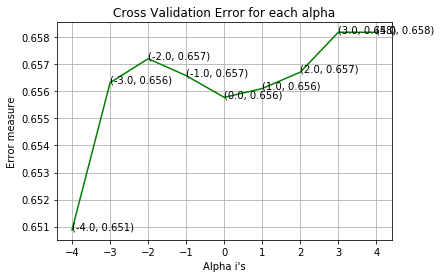

For values of best alpha =  0.0001 The train log loss is: 0.6514040376138494
For values of best alpha =  0.0001 The test log loss is: 0.656283930162794
Total number of data points : 30000


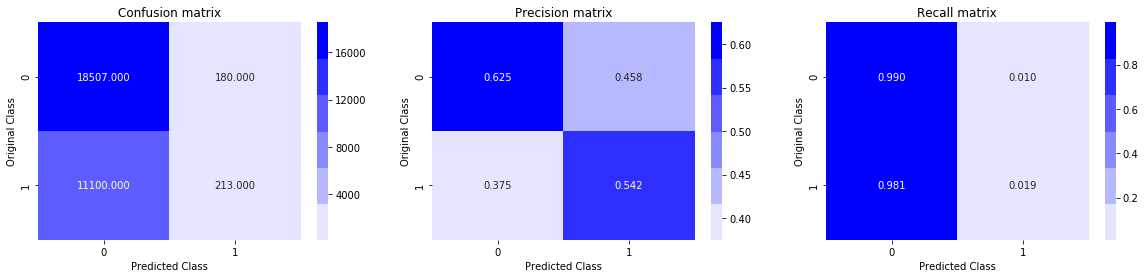

In [446]:
alpha = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    lclf = SGDClassifier(alpha=i, penalty='l2', loss='log',class_weight='balanced',random_state=12)
    lclf.fit(x_scaled_train, y_tfidf_train)
    lclf_cc = CalibratedClassifierCV(lclf, method="sigmoid")
    lclf_cc.fit(x_scaled_train, y_tfidf_train)
    predict_y = lclf_cc.predict_proba(x_scaled_cv)
    log_error_array.append(log_loss(y_tfidf_cv, predict_y))
    print('For values of alpha = ', i,"\t", "The  CV log loss is:",log_loss(y_tfidf_cv, predict_y))
    
#plotting
log_c = [math.log10(num) for num in alpha]
fig, ax = plt.subplots()
ax.plot(log_c, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((log_c[i],np.round(txt,3)), (log_c[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

#modelling with optimal alpha
best_alpha = np.argmin(log_error_array)
lclf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log',class_weight='balanced',random_state=12)
lclf.fit(x_scaled_train, y_tfidf_train)
lclf_cc = CalibratedClassifierCV(lgs_clf, method="sigmoid")
lclf_cc.fit(x_scaled_train, y_tfidf_train)

predict_y = lclf_cc.predict_proba(x_scaled_train)
print('For values of best alpha = ',alpha[best_alpha], "The train log loss is:",log_loss(y_tfidf_train, predict_y,))
predict_y = lclf_cc.predict_proba(x_scaled_test)
print('For values of best alpha = ', alpha[best_alpha],"The test log loss is:",log_loss(y_tfidf_test, predict_y,))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_tfidf_test, predicted_y)

<h1> Linear SVM with Simple TFIDF </h1> 

For values of alpha =  0.0001 	 The  CV log loss is: 0.6500143859763717
For values of alpha =  0.001 	 The  CV log loss is: 0.658183951474479
For values of alpha =  0.01 	 The  CV log loss is: 0.658183951474479
For values of alpha =  0.1 	 The  CV log loss is: 0.658183951474479
For values of alpha =  1 	 The  CV log loss is: 0.658183951474479
For values of alpha =  10 	 The  CV log loss is: 0.658183951474479
For values of alpha =  100 	 The  CV log loss is: 0.658183951474479
For values of alpha =  1000 	 The  CV log loss is: 0.658183951474479
For values of alpha =  10000 	 The  CV log loss is: 0.658183951474479


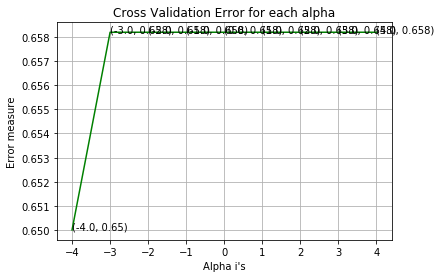

For values of best alpha =  0.0001 The train log loss is: 0.6516094178101003
For values of best alpha =  0.0001 The test log loss is: 0.6562837331503985
Total number of data points : 30000


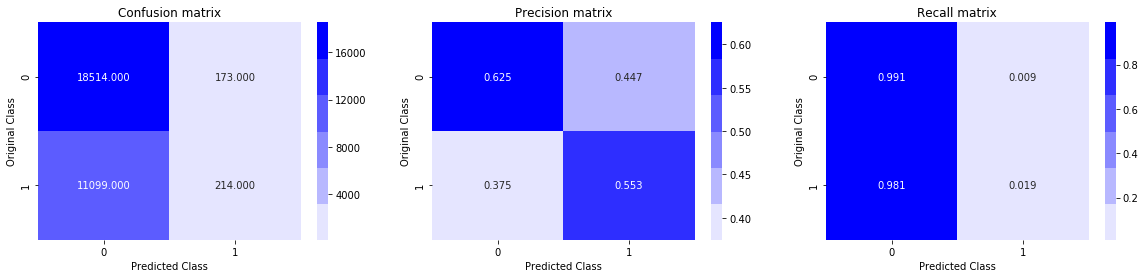

In [447]:
alpha = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000] # hyperparam for SGD classifier.

log_error=[]
for i in alpha:
    svm_clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge',class_weight='balanced',random_state=13)
    svm_clf.fit(x_scaled_train, y_tfidf_train)
    cc_svm = CalibratedClassifierCV(svm_clf, method="sigmoid")
    cc_svm.fit(x_scaled_train, y_tfidf_train)
    predict_y = cc_svm.predict_proba(x_scaled_cv)
    log_error.append(log_loss(y_tfidf_cv, predict_y))
    print('For values of alpha = ', i,"\t", "The  CV log loss is:",log_loss(y_tfidf_cv, predict_y))
    
#plotting
log_c = [math.log10(num) for num in alpha]
fig, ax = plt.subplots()
ax.plot(log_c, log_error,c='g')
for i, txt in enumerate(np.round(log_error,3)):
    ax.annotate((log_c[i],np.round(txt,3)), (log_c[i],log_error[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

#modelling with optimal alpha
best_alpha = np.argmin(log_error)
svm_clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge',class_weight='balanced',random_state=13)
svm_clf.fit(x_scaled_train, y_tfidf_train)
cc_svm = CalibratedClassifierCV(svm_clf, method="sigmoid")
cc_svm.fit(x_scaled_train, y_tfidf_train)

predict_y = cc_svm.predict_proba(x_scaled_train)
print('For values of best alpha = ',alpha[best_alpha], "The train log loss is:",log_loss(y_tfidf_train, predict_y,))
predict_y = cc_svm.predict_proba(x_scaled_test)
print('For values of best alpha = ', alpha[best_alpha],"The test log loss is:",log_loss(y_tfidf_test, predict_y,))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_tfidf_test, predicted_y)

In [449]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = [ "Model","vectorizer", "alpha", "Train_log_loss","test_log_loss"]

x.add_row(["Logistic","TFIDF",0.0001,0.65,0.65])
x.add_row(["SVM","TFIDF",0.0001, 0.65,0.65])
print(x)

+----------+------------+--------+----------------+---------------+
|  Model   | vectorizer | alpha  | Train_log_loss | test_log_loss |
+----------+------------+--------+----------------+---------------+
| Logistic |   TFIDF    | 0.0001 |      0.65      |      0.65     |
|   SVM    |   TFIDF    | 0.0001 |      0.65      |      0.65     |
+----------+------------+--------+----------------+---------------+


<h2>Observations For Logistic and SVM</h2>

1.We use Quora Question Pair Similarity to detect wheater the question are duplicate or not <br>
2.We create some basic feature extraction using the existing data ,this feature extraction will help us to increase the model results <br>
4.We also create some advanced feature extraction which also improves model's results and compute some data cleaning <br>
5.We Compute EDA and Data visualization to better understand the data <br>
6.We merge all the features and splited the data into train ,test and cv <br>
7.Then we applied TFIDF Vectorizer and TFIDFw2V which is (Using Spacy words )<br>
8.We used TFIDF features for Logistic Regression and SVM <br>
9.We used TFIDFW2V for XG-BOOST <br>
10.After we perform Logisitc regression and SVM We got biased results for both Logistic regression and SVM 